In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pandas_profiling
np.random.seed(123)

In [2]:
# Import the raw data set
df_raw = pd.read_csv('diabetic_data.csv')

In [3]:
df_raw.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df_raw = df_raw.replace("?",np.NaN)

In [6]:
df_raw.shape

(101766, 50)

In [35]:
df_raw.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
df_raw.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [11]:
# Get an understanding of missingness, unique values, and head/tail sample
for col in df_raw:
    print(df_raw[col])
    print("**************************************************************************************")
    print(df_raw[col].unique())
    print("**************************************************************************************")
    print("**************************************************************************************")

0           2278392
1            149190
2             64410
3            500364
4             16680
            ...    
101761    443847548
101762    443847782
101763    443854148
101764    443857166
101765    443867222
Name: encounter_id, Length: 101766, dtype: int64
**************************************************************************************
[  2278392    149190     64410 ... 443854148 443857166 443867222]
**************************************************************************************
**************************************************************************************
0           8222157
1          55629189
2          86047875
3          82442376
4          42519267
            ...    
101761    100162476
101762     74694222
101763     41088789
101764     31693671
101765    175429310
Name: patient_nbr, Length: 101766, dtype: int64
**************************************************************************************
[  8222157  55629189  86047875 ... 140199494 1209

In [67]:
# Get a closer look at the composition of the data - warning results in large file size
#df_raw.profile_report()

In [12]:
# Cut df in half for closer inspection
df1 = df_raw.iloc[:, 0:22]
df1 = df1.join(df_raw["readmitted"])

In [13]:
df1

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,0,1,0,0,0,250.83,NaN,NaN,1,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,0,18,0,0,0,276,250.01,255,9,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,5,13,2,0,1,648,250,V27,6,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,1,16,0,0,0,8,250.43,403,7,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,0,8,0,0,0,197,157,250,5,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,0,16,0,0,0,250.13,291,458,9,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,3,18,0,0,1,560,276,787,9,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,0,9,1,0,0,38,590,296,13,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,2,21,0,0,1,996,285,998,9,NO


In [47]:
# Drop columns for missingness
df1 = df1.drop(columns="weight")
df1 = df1.drop(columns="payer_code")
df1 = df1.drop(columns="medical_specialty")

In [ ]:
# Dealing with Missingness
df1 = df1.replace("?",np.NaN, inplace = True)
df1.race = df1.race.replace("?","unknown", inplace = True)
df1 = df1.replace(np.NaN, "missing", inplace = True)

In [187]:
# Delete dups, keeping the first encounter
df1 = df1.drop_duplicates('patient_nbr', keep = 'first')
df1 = df1.drop(columns="encounter_id")
df1 = df1.drop(columns="patient_nbr")
df1.shape

(71518, 18)

In [58]:
# Recheck for missingness
df1.isna().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
readmitted                  0
dtype: int64

In [44]:
# Simplify target to binary
df1.readmitted = df1.readmitted.apply(lambda x: 'Y' if x in ['<30'] else 'N')

In [59]:
# Looking at correlation - keep an eye out for time_in_hospital vs num_medications
corr = df1.corr()

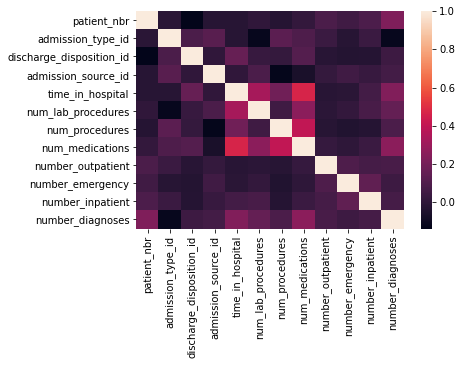

In [60]:
sns.heatmap(corr)

In [68]:
# One more look at the structure of the cleaned data - warning results in large file size
#df1.profile_report()

In [72]:
# Consolidation of the diagnostic codes
df1.diag_1.unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '564', '812',
       '38', '590', '556', '578', '250.32', '433', 'V58', '569', '185',
       '536', '255', '250.13', '599', '558', '574', '491', '560', '244',
       '250.03', '577', '730', '188', '824', '250.8', '332', '562', '291',
       '296', '510', '401', '263', '438', '70', '250.02', '493', '642',
       '625', '571', '738', '593', '250.42', '807', '456', '446', '575',
       '250.41', '820', '515', '780', '250.22', '995', '235', '250.82',
       '721', '787', '162', '724', '282', '514', 'V55', '281', '250.33',
       '466', '435', '250.12', 'V53', '789', '566', '822', '

In [117]:
testdf = df1.copy()

In [76]:
testdf

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,missing,missing,1,N
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,N
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,N
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,N
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,183087545,Caucasian,Female,[70-80),1,1,7,9,50,2,33,0,0,0,574,574,250.02,9,N
101755,188574944,Other,Female,[40-50),1,1,7,14,73,6,26,0,1,0,592,599,518,9,N
101756,140199494,Other,Female,[60-70),1,1,7,2,46,6,17,1,1,1,996,585,403,9,N
101758,120975314,Caucasian,Female,[80-90),1,1,7,5,76,1,22,0,1,0,292,8,304,9,N


In [109]:
testdf.loc[testdf["diag_1"].str.contains("250")] = "9999"

In [88]:
sorted(list(testdf.diag_1.unique()))

['10',
 '11',
 '110',
 '112',
 '114',
 '115',
 '117',
 '131',
 '133',
 '135',
 '136',
 '141',
 '142',
 '143',
 '145',
 '146',
 '147',
 '148',
 '149',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '160',
 '161',
 '162',
 '163',
 '164',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '179',
 '180',
 '182',
 '183',
 '184',
 '185',
 '187',
 '188',
 '189',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '198',
 '199',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '207',
 '208',
 '210',
 '211',
 '212',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '220',
 '223',
 '225',
 '226',
 '227',
 '228',
 '229',
 '230',
 '233',
 '235',
 '236',
 '237',
 '238',
 '239',
 '240',
 '241',
 '242',
 '244',
 '245',
 '246',
 '251',
 '252',
 '253',
 '255',
 '261',
 '262',
 '263',
 '266',
 '27',
 '272',
 '273',
 '274',
 '275',
 '276',
 '277',
 '278',
 '280',
 '281',
 '282',
 '283',
 '284',
 '285',
 '286',
 '287',
 '288',
 '289',
 '290',
 '291',
 '292',
 '293',
 '294',
 '2

In [89]:
sorted(list(testdf.diag_2.unique()))

['11',
 '110',
 '112',
 '114',
 '117',
 '123',
 '130',
 '131',
 '135',
 '136',
 '137',
 '138',
 '140',
 '141',
 '145',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '162',
 '163',
 '164',
 '171',
 '172',
 '173',
 '174',
 '179',
 '180',
 '182',
 '183',
 '185',
 '186',
 '188',
 '189',
 '191',
 '192',
 '193',
 '196',
 '197',
 '198',
 '199',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '208',
 '211',
 '212',
 '214',
 '215',
 '217',
 '218',
 '220',
 '223',
 '225',
 '226',
 '227',
 '228',
 '232',
 '233',
 '235',
 '238',
 '239',
 '240',
 '241',
 '242',
 '244',
 '245',
 '246',
 '250',
 '250.01',
 '250.02',
 '250.03',
 '250.1',
 '250.11',
 '250.12',
 '250.13',
 '250.2',
 '250.22',
 '250.23',
 '250.32',
 '250.33',
 '250.4',
 '250.41',
 '250.42',
 '250.43',
 '250.5',
 '250.51',
 '250.52',
 '250.53',
 '250.6',
 '250.7',
 '250.8',
 '250.81',
 '250.82',
 '250.83',
 '250.9',
 '250.91',
 '250.92',
 '250.93',
 '251',
 '252',
 '253',
 '255',
 '256',
 '258',
 '259',
 '260',
 '261',

In [90]:
sorted(list(testdf.diag_3.unique()))

['110',
 '112',
 '115',
 '117',
 '123',
 '131',
 '135',
 '136',
 '138',
 '139',
 '14',
 '141',
 '148',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '161',
 '162',
 '163',
 '164',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '179',
 '180',
 '182',
 '183',
 '185',
 '188',
 '189',
 '191',
 '192',
 '193',
 '195',
 '196',
 '197',
 '198',
 '199',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '208',
 '211',
 '214',
 '216',
 '217',
 '218',
 '220',
 '223',
 '225',
 '226',
 '227',
 '228',
 '233',
 '235',
 '238',
 '239',
 '240',
 '241',
 '242',
 '244',
 '245',
 '246',
 '250',
 '250.01',
 '250.02',
 '250.03',
 '250.1',
 '250.11',
 '250.12',
 '250.13',
 '250.2',
 '250.21',
 '250.22',
 '250.3',
 '250.31',
 '250.4',
 '250.41',
 '250.42',
 '250.43',
 '250.5',
 '250.51',
 '250.52',
 '250.53',
 '250.6',
 '250.7',
 '250.8',
 '250.81',
 '250.82',
 '250.83',
 '250.9',
 '250.91',
 '250.92',
 '250.93',
 '251',
 '252',
 '253',
 '255',
 '256',
 '258',
 '259',
 '260',
 '261',
 

In [128]:
# A function to group diag codes with the data frame and diag column as inputs
def diag_grouper(df, col):
    df.loc[df.col.str.contains("250")] = 9999
    df.loc[df.col.str.contains("V")] = 123456
    df.loc[df.col.str.contains("E")] = 123456
    df.loc[df.col.str.contains("missing")] = -654321
    df.col = df.col.astype(float)
    df.col[((df.col>=1) & (df.col<=139))] = 10000
    df.col[((df.col>=140) & (df.col<=239))] = 10001
    df.col[((df.col>=240) & (df.col<=279))] = 10002
    df.col[((df.col>=280) & (df.col<=289))] = 10003
    df.col[((df.col>=290) & (df.col<=319))] = 10004
    df.col[((df.col>=320) & (df.col<=389))] = 10005
    df.col[((df.col>=390) & (df.col<=459))] = 10006
    df.col[((df.col>=460) & (df.col<=519))] = 10007
    df.col[((df.col>=520) & (df.col<=579))] = 10008
    df.col[((df.col>=580) & (df.col<=629))] = 10009
    df.col[((df.col>=630) & (df.col<=679))] = 10010
    df.col[((df.col>=680) & (df.col<=709))] = 10011
    df.col[((df.col>=710) & (df.col<=739))] = 10012
    df.col[((df.col>=740) & (df.col<=759))] = 10013
    df.col[((df.col>=760) & (df.col<=779))] = 10014
    df.col[((df.col>=780) & (df.col<=799))] = 10015
    df.col[((df.col>=800) & (df.col<=999))] = 10016
    df.col.replace(10000, "Infectious and Parasitic Disease", inplace = True)
    df.col.replace(10001, "Neoplasms", inplace = True)
    df.col.replace(10002, "Endocrine/Metabolic/Immunity Disorder", inplace = True)
    df.col.replace(10003, "Blood/Blood Forming Organ Disease", inplace = True)
    df.col.replace(10004, "Mental Disorder", inplace = True)
    df.col.replace(10005, "Nervous System/Sense Organ Disease", inplace = True)
    df.col.replace(10006, "Circulatory Disease", inplace = True)
    df.col.replace(10007, "Respiratory Disease", inplace = True)
    df.col.replace(10008, "Digestive Disease", inplace = True)
    df.col.replace(10009, "Genitourinary Disease", inplace = True)
    df.col.replace(10010, "Complications of Pregnancy/Childbirth/Puerperium", inplace = True)
    df.col.replace(10011, "Skin Disease", inplace = True)
    df.col.replace(10012, "Musculoskeletal/Connective Tissue Disease", inplace = True)
    df.col.replace(10013, "Congenital Anomalies", inplace = True)
    df.col.replace(10014, "Conditions of Perinatal Origin", inplace = True)
    df.col.replace(10015, "Symptoms/Signs/Ill-Defined Conditions", inplace = True)
    df.col.replace(10016, "Injury and Poisoning", inplace = True)
    df.col.replace(9999, "Diabetes", inplace = True)
    df.col.replace(123456, "External Injury/Supplemental", inplace = True)
    df.col.replace(-654321, "Missing", inplace = True)

In [121]:
testdf = df1.copy()
testdf.loc[testdf.diag_1.str.contains("250")] = '9999'
testdf.loc[testdf.diag_1.str.contains("V")] = '123456'
testdf.loc[testdf.diag_1.str.contains("E")] = '123456'
testdf.loc[testdf.diag_1.str.contains("missing")] = '-654321'
testdf.diag_1 = testdf.diag_1.astype(float)
testdf.diag_1[((testdf.diag_1>=1) & (testdf.diag_1<=139))] = 10000
testdf.diag_1[((testdf.diag_1>=140) & (testdf.diag_1<=239))] = 10001
testdf.diag_1[((testdf.diag_1>=240) & (testdf.diag_1<=279))] = 10002
testdf.diag_1[((testdf.diag_1>=280) & (testdf.diag_1<=289))] = 10003
testdf.diag_1[((testdf.diag_1>=290) & (testdf.diag_1<=319))] = 10004
testdf.diag_1[((testdf.diag_1>=320) & (testdf.diag_1<=389))] = 10005
testdf.diag_1[((testdf.diag_1>=390) & (testdf.diag_1<=459))] = 10006
testdf.diag_1[((testdf.diag_1>=460) & (testdf.diag_1<=519))] = 10007
testdf.diag_1[((testdf.diag_1>=520) & (testdf.diag_1<=579))] = 10008
testdf.diag_1[((testdf.diag_1>=580) & (testdf.diag_1<=629))] = 10009
testdf.diag_1[((testdf.diag_1>=630) & (testdf.diag_1<=679))] = 10010
testdf.diag_1[((testdf.diag_1>=680) & (testdf.diag_1<=709))] = 10011
testdf.diag_1[((testdf.diag_1>=710) & (testdf.diag_1<=739))] = 10012
testdf.diag_1[((testdf.diag_1>=740) & (testdf.diag_1<=759))] = 10013
testdf.diag_1[((testdf.diag_1>=760) & (testdf.diag_1<=779))] = 10014
testdf.diag_1[((testdf.diag_1>=780) & (testdf.diag_1<=799))] = 10015
testdf.diag_1[((testdf.diag_1>=800) & (testdf.diag_1<=999))] = 10016
testdf.diag_1.replace(10000, "Infectious and Parasitic Disease", inplace = True)
testdf.diag_1.replace(10001, "Neoplasms", inplace = True)
testdf.diag_1.replace(10002, "Endocrine/Metabolic/Immunity Disorder", inplace = True)
testdf.diag_1.replace(10003, "Blood/Blood Forming Organ Disease", inplace = True)
testdf.diag_1.replace(10004, "Mental Disorder", inplace = True)
testdf.diag_1.replace(10005, "Nervous System/Sense Organ Disease", inplace = True)
testdf.diag_1.replace(10006, "Circulatory Disease", inplace = True)
testdf.diag_1.replace(10007, "Respiratory Disease", inplace = True)
testdf.diag_1.replace(10008, "Digestive Disease", inplace = True)
testdf.diag_1.replace(10009, "Genitourinary Disease", inplace = True)
testdf.diag_1.replace(10010, "Complications of Pregnancy/Childbirth/Puerperium", inplace = True)
testdf.diag_1.replace(10011, "Skin Disease", inplace = True)
testdf.diag_1.replace(10012, "Musculoskeletal/Connective Tissue Disease", inplace = True)
testdf.diag_1.replace(10013, "Congenital Anomalies", inplace = True)
testdf.diag_1.replace(10014, "Conditions of Perinatal Origin", inplace = True)
testdf.diag_1.replace(10015, "Symptoms/Signs/Ill-Defined Conditions", inplace = True)
testdf.diag_1.replace(10016, "Injury and Poisoning", inplace = True)
testdf.diag_1.replace(9999, "Diabetes", inplace = True)
testdf.diag_1.replace(123456, "External Injury/Supplemental", inplace = True)
testdf.diag_1.replace(-654321, "Missing", inplace = True)

<ipython-input-121-f8dbe5b385eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.diag_1[((testdf.diag_1>=1) & (testdf.diag_1<=139))] = 10000
<ipython-input-121-f8dbe5b385eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.diag_1[((testdf.diag_1>=140) & (testdf.diag_1<=239))] = 10001
<ipython-input-121-f8dbe5b385eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.diag_1[((testdf.diag_1>=240) & (testdf.diag_1<=279

In [471]:
testdf = df1.copy()
#diag_grouper(testdf, 'diag_1')

In [472]:
'''takes input as df.col and outputs diag groupings'''

def diag_grouper(series):
    
    def no_str(x):
        if '250' in x: return '9999'
        elif 'E' in x: return '123456'
        elif 'V' in x: return '123456'
        elif x == 'missing': return '-654321'
        else: return x
        
    series = series.apply(no_str)
    series = series.astype(float)
    
    def num_categ(x):
        if 1 <= x <= 139: return 10000
        elif 140 <= x <= 239: return 10001
        elif 240 <= x <= 279: return 10002
        elif 280 <= x <= 289: return 10003
        elif 290 <= x <= 319: return 10004
        elif 320 <= x <= 389: return 10005
        elif 390 <= x <= 459: return 10006
        elif 460 <= x <= 519: return 10007
        elif 520 <= x <= 579: return 10008
        elif 580 <= x <= 629: return 10009
        elif 630 <= x <= 679: return 10010
        elif 680 <= x <= 709: return 10011
        elif 710 <= x <= 739: return 10012
        elif 740 <= x <= 759: return 10013
        elif 760 <= x <= 779: return 10014
        elif 780 <= x <= 799: return 10015
        elif 800 <= x <= 999: return 10016
        else: return x
        
    series = series.apply(num_categ)
    
    def text_convert(x):
        if x == 10000: return "Infectious and Parasitic Disease"
        elif x == 10001: return "Neoplasms"
        elif x == 10002: return "Endocrine/Metabolic/Immunity Disorder"
        elif x == 10003: return "Blood/Blood Forming Organ Disease"
        elif x == 10004: return "Mental Disorder"
        elif x == 10005: return "Nervous System/Sense Organ Disease"
        elif x == 10006: return "Circulatory Disease"
        elif x == 10007: return "Respiratory Disease"
        elif x == 10008: return "Digestive Disease"
        elif x == 10009: return "Genitourinary Disease"
        elif x == 10010: return "Complications of Pregnancy/Childbirth/Puerperium"
        elif x == 10011: return "Skin Disease"
        elif x == 10012: return "Musculoskeletal/Connective Tissue Disease"
        elif x == 10013: return "Congenital Anomalies"
        elif x == 10014: return "Conditions of Perinatal Origin"
        elif x == 10015: return "Symptoms/Signs/Ill-Defined Conditions"
        elif x == 10016: return "Injury and Poisoning"
        elif x == 9999: return "Diabetes"
        elif x == 123456: return "External Injury/Supplemental"
        elif x == -654321: return "Missing"
    
    return series.apply(text_convert)
    
    #print 'one' if a == 1 else 'two' if a == 2 else 'none'

In [473]:
testdf.diag_1 = diag_grouper(testdf.diag_1)
testdf.diag_2 = diag_grouper(testdf.diag_2)
testdf.diag_3 = diag_grouper(testdf.diag_3)

In [474]:
testdf.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,Diabetes,Missing,Missing,1,N
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,Endocrine/Metabolic/Immunity Disorder,Diabetes,Endocrine/Metabolic/Immunity Disorder,9,N
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,Complications of Pregnancy/Childbirth/Puerperium,Diabetes,External Injury/Supplemental,6,N
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Disease,Diabetes,Circulatory Disease,7,N
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,N


In [ ]:
testdf.diag_1.replace(10000, "Infectious and Parasitic Disease", inplace = True)
testdf.diag_1.replace(10001, "Neoplasms", inplace = True)
testdf.diag_1.replace(10002, "Endocrine/Metabolic/Immunity Disorder", inplace = True)
testdf.diag_1.replace(10003, "Blood/Blood Forming Organ Disease", inplace = True)
testdf.diag_1.replace(10004, "Mental Disorder", inplace = True)
testdf.diag_1.replace(10005, "Nervous System/Sense Organ Disease", inplace = True)
testdf.diag_1.replace(10006, "Circulatory Disease", inplace = True)
testdf.diag_1.replace(10007, "Respiratory Disease", inplace = True)
testdf.diag_1.replace(10008, "Digestive Disease", inplace = True)
testdf.diag_1.replace(10009, "Genitourinary Disease", inplace = True)
testdf.diag_1.replace(10010, "Complications of Pregnancy/Childbirth/Puerperium", inplace = True)
testdf.diag_1.replace(10011, "Skin Disease", inplace = True)
testdf.diag_1.replace(10012, "Musculoskeletal/Connective Tissue Disease", inplace = True)
testdf.diag_1.replace(10013, "Congenital Anomalies", inplace = True)
testdf.diag_1.replace(10014, "Conditions of Perinatal Origin", inplace = True)
testdf.diag_1.replace(10015, "Symptoms/Signs/Ill-Defined Conditions", inplace = True)
testdf.diag_1.replace(10016, "Injury and Poisoning", inplace = True)
testdf.diag_1.replace(9999, "Diabetes", inplace = True)
testdf.diag_1.replace(123456, "External Injury/Supplemental", inplace = True)
testdf.diag_1.replace(-654321, "Missing", inplace = True)

In [273]:
testdf.diag_1 = testdf.diag_1.apply(diag_grouper, testdf.diag_1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [256]:
testdf.diag_1.unique()

array([None], dtype=object)

In [441]:
def num_categ(x):
    if (1 <= x <= 139): return 10000
    elif (140 <= x <= 200): return 10002 

In [442]:
xx = [1, 57, 150, 250]

In [443]:
xx = list(map(float, xx))

In [444]:
list(map(num_categ,xx))

[10000, 10000, 10002, None]

In [445]:
def num_categ(x):
        if 1 <= x <= 139: return 10000
        elif 140 <= x <= 239: return 10001
        elif 240 <= x <= 279: return 10002
        elif 280 <= x <= 289: return 10003
        elif 290 <= x <= 319: return 10004
        elif 320 <= x <= 389: return 10005
        elif 390 <= x <= 459: return 10006
        elif 460 <= x <= 519: return 10007
        elif 520 <= x <= 579: return 10008
        elif 580 <= x <= 629: return 10009
        elif 630 <= x <= 679: return 10010
        elif 680 <= x <= 709: return 10011
        elif 710 <= x <= 739: return 10012
        elif 740 <= x <= 759: return 10013
        elif 760 <= x <= 779: return 10014
        elif 780 <= x <= 799: return 10015
        elif 800 <= x <= 999: return 10016

In [440]:
testdf.diag_1.apply(num_categ)

TypeError: '<=' not supported between instances of 'int' and 'str'